In [300]:
#pytorch end to end workflow
import torch
from torch import nn ##nn contains all of pytorchs building blcoks for neural networks
import matplotlib.pyplot as plt 

#check pytorch version
torch.__version__

'2.0.1'

## 1.data prep and loading 

dta can be almost everything
* excel spreadsheet
* images
* videoes
* audio
* DNA
* text

machien laerning is game of two parts:
1. get data intoa numerical respresentation
2. build a model to learn the parttersn of the numerical rep

we'll be using the classic linear regression Y = a + bX
to make a straight line with known **parameters**

In [301]:
#create the knwon parameters
weight = 0.7
bias = 0.3

#create
start = 0 
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias # y = bx + a => linear reg formula 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [302]:
len(X), len(y)

(50, 50)

In [303]:
#now we have to train a model to learn relationship of X with y 
#now splitting data into traingin and test set
# trainign set - base learning (60-80%) (alaways)
# validation set -tuning   ( 10-20%) (often)
# test set - final (10-20%) (awlays)

In [304]:
#nwo we wont be usign a validation set thereore
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test  = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
#you can also use scikit learn train_test_splits for randomness

(40, 40, 10, 10)

In [305]:
#now to visualizevisualizevisualize visualizevisualize visualize
def plot_predictions( train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plot training data, test data nd compares predictions.
    """
    plt.figure(figsize = (10,7))
    #plot traing data in blue
    plt.scatter(train_data, train_labels , c = 'b', s =4 , label = "training data")

    plt.scatter(test_data, test_labels, c= 'r', s=4, label = "testing data")

    if predictions is not None:
        #plot the preds
        plt.scatter(test_data, predictions, c = 'g', s =4, label = "Preds")

    #show the legend
    plt.legend(prop = {"size": 14})

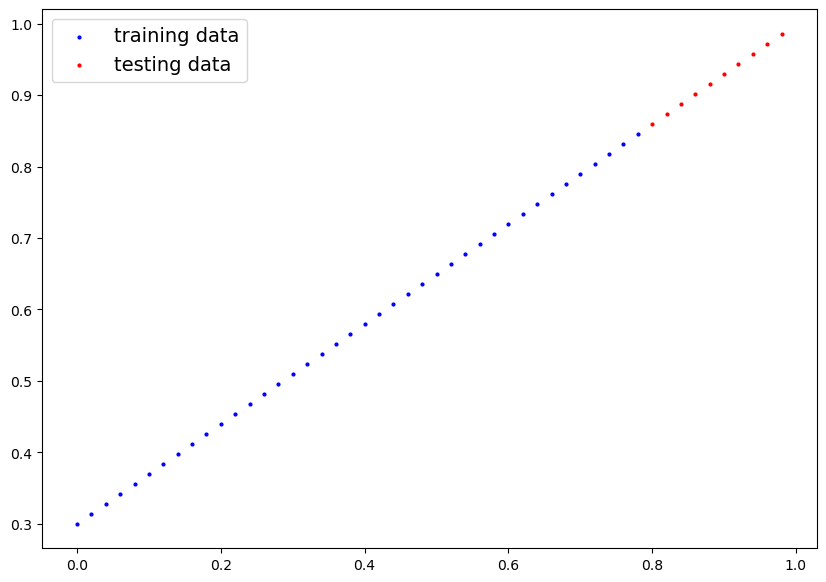

In [306]:
plot_predictions()

In [307]:
#red is actual value lets pred the values to plot the green dots
#bulding our model
#creating a linear regression formula in pytorch
from torch import nn #has building blocks for neural netwroks
class LinearRegressionModel(nn.Module): #<- out model inherits nn.modele
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float32)) #dfeualt for pytorch
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor: #<- x is the input /training data
        return self.weights * x + self.bias #this is the linear reg formula 



In [308]:
torch.randn(1)

tensor([0.2345])

In [309]:
### checking the contents of our pytorch model using '.parameters'

#creating a rnadom seed for producibility 
# torch.manual_seed(123412) #shitest random seed ive seen #loss wont go below 0.1 :(
torch.manual_seed(42)
#create an instance of th emodel (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [310]:
#list the named parameters
model_0.state_dict() #state dictionary

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [311]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [312]:
y_preds = model_0(X_test)
y_preds
#u can see the last line it i tracking grad

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [313]:
#making predictions using torch.inference_mode() WITHOUT TRAINING
#to check our models predictive power
with torch.inference_mode():
    y_preds = model_0(X_test)
#inference mode turns of gradient tracking # doesn have to track gradident therefore faster predictions
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

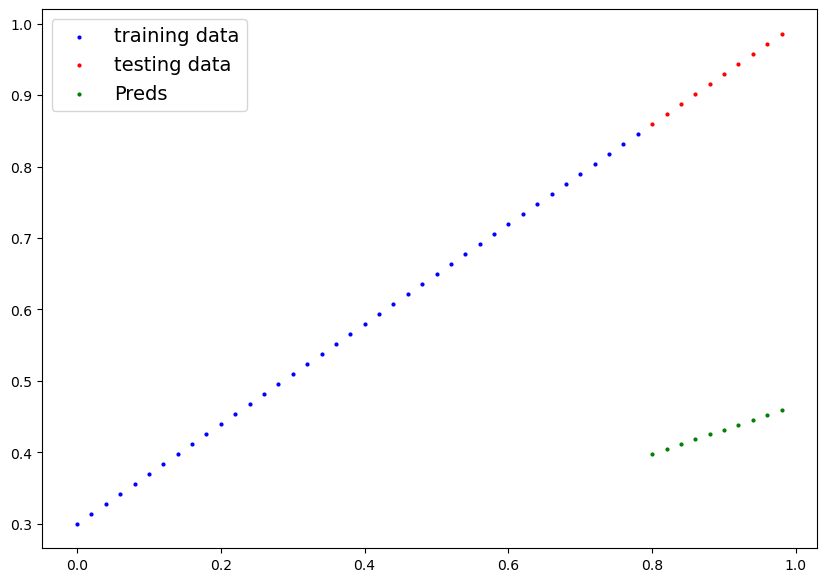

In [314]:
plot_predictions(predictions=y_preds)
#are as good as random

In [315]:
#trainign our model
#ie moving from random parameters to some traininged / betteer representation
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [316]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [317]:
 #we need  to setup a loss/criterion function and an optimizer
#setting up a loss funciont
loss_fn = nn.L1Loss() #mae and mse for regression and binary/ categorical  cross entrpy for classification
#setting up an optimizer fc
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01)
# lr is one of the most import hyperparameter u can set #hyper paras are paras set by coder
#stastic gd is random gd ie it finds the local minima instead of global minima which is incrediblity hard to find


In [318]:
#we need to nuild a training looop and testing loop in pytrch
#list of things to do
# 0. loop thorugh the data
# 1. forward pass (this invlies data movign through our model's `forward()` fiunciton)
# also called forward propogation
# 2.claculate the loss ( compaae foward pass preedicitions to ground turth labels)
# 3. optimizer zerp grad
# 4. loss backward - move backwards  thorguh the networks to calc the gradients of the each of the paramter of oour models iwth respect ot the loss backwards propogation
# 5 .optimizer step - optimer to adjust our paramters to redce the loss (grdient descent)


In [319]:
# with torch.inference_mode():
#     pass
# with torch.eval():
#     pass

In [320]:
epochs = 200# an epoch is a loop thourgh data(this is a hyperparamter)
#tracking values
epoch_count = []
loss_values = []
test_loss_values = []
#0. loop thourgh the data
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode sets all parameters that require grdaents to req gradients
    #1. forward pass
    y_pred = model_0(X_train)
    #2. calc the loss
    loss = loss_fn(y_pred, y_train) #input first then actual labels/ ground trth values
    print(f"loss: {loss}")
    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. perform backprog on the los iwth respec to the paramters othe model
    loss.backward()
    #5. step the optimizer (perform grad desecent)
    optimizer.step() #ny default he optimzer changes accumulat e thourgh the loop... so we have to zero them above in the step3 of the loop

    model_0.eval()# turns off graident tracking also (dropout/ batchnorm layers)
    with torch.inference_mode():
        #1. forward pass
        test_pred = model_0(X_test)

        #2. calc the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())

loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006635546684265
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681284427642822
loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss: 0.08227583020925522
loss: 0

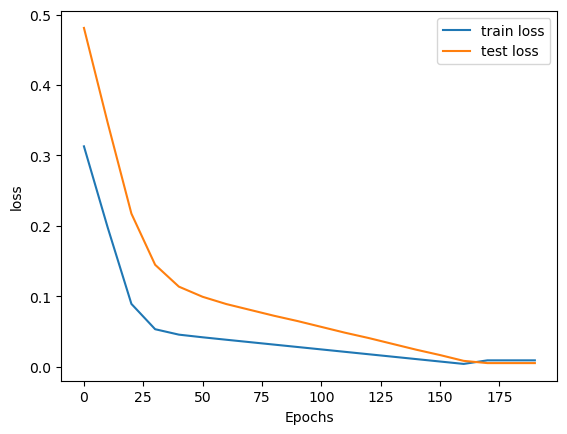

In [321]:
#plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [322]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [323]:
weight, bias

(0.7, 0.3)

In [324]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    

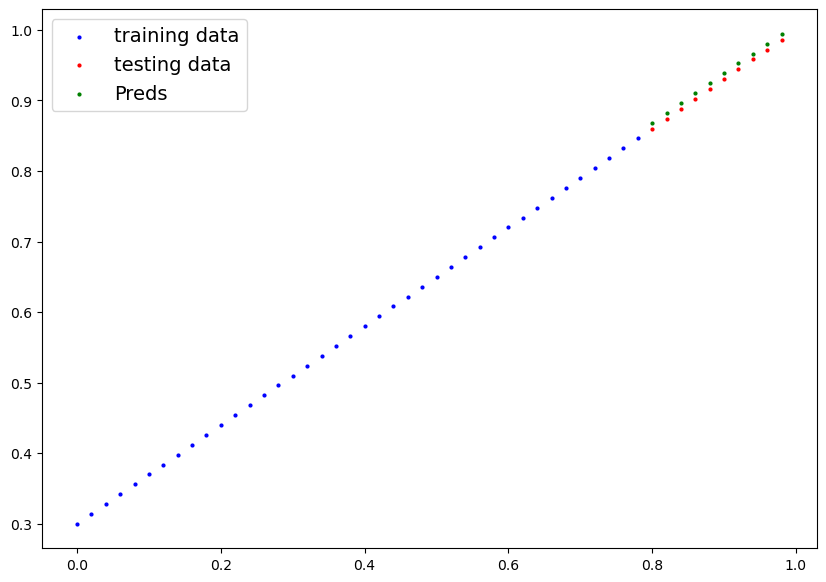

In [325]:
plot_predictions(predictions=y_preds_new)